### About This Dataset

This project utilizes the UCI Machine Learning Drug Review Dataset published by the UCI Machine Learning Repository, hosted by Kaggle. The dataset contains over 200,000 individual patient drug reviews containing information on the patient conditions, prescribed medicines, textual reviews, and ordinal rating between 1 and 10. A preliminary analysis of the data revealed that a majority of the reviews are either 1 or 10, so all other reviews with ratings between 2 and 9 (inclusive) are dropped to improve model parameter learning. The dataset is then split in training and testing sets with a 75% training to 25% testing ratio.

### Import Statements

In [1]:
import matplotlib.pyplot as plt

from src.dataset import ReviewDataset

### Environment Variables

In [2]:
data_path_all = "../../data/all.csv"
data_path_train = "../../data/train.csv"
data_path_test = "../../data/test.csv"

### Load Data

In [3]:
dataset_all = ReviewDataset(data_path_all, preprocess=False)

### Data Sample

In [4]:
dataset_all.head()

,drug_name,condition,review,rating
0,mirtazapine,depression,I&#039;ve tried a few antidepressants over the...,10
1,mesalamine,"crohn's disease, maintenance",My son has Crohn&#039;s disease and has done v...,8
2,bactrim,urinary tract infection,Quick reduction of symptoms,9
3,contrave,weight loss,Contrave combines drugs that were used for alc...,9
4,cyclafem 1 / 35,birth control,I have been on this birth control for one cycl...,9
5,zyclara,keratosis,4 days in on first 2 weeks. Using on arms and...,4
6,copper,birth control,I&#039;ve had the copper coil for about 3 mont...,6
7,amitriptyline,migraine prevention,This has been great for me. I&#039;ve been on ...,9
8,methadone,opiate withdrawal,Ive been on Methadone for over ten years and c...,7
9,levora,birth control,I was on this pill for almost two years. It do...,2


### Data Exploration

In [5]:
print("Number of Reviews: ", len(dataset_all))
print("Number of Drugs: ", len(dataset_all.get_drug_names()))
print("Number of Conditions: ", len(dataset_all.get_conditions()))

Number of Reviews:  215063
Number of Drugs:  3671
Number of Conditions:  917


### Data Class Distribution

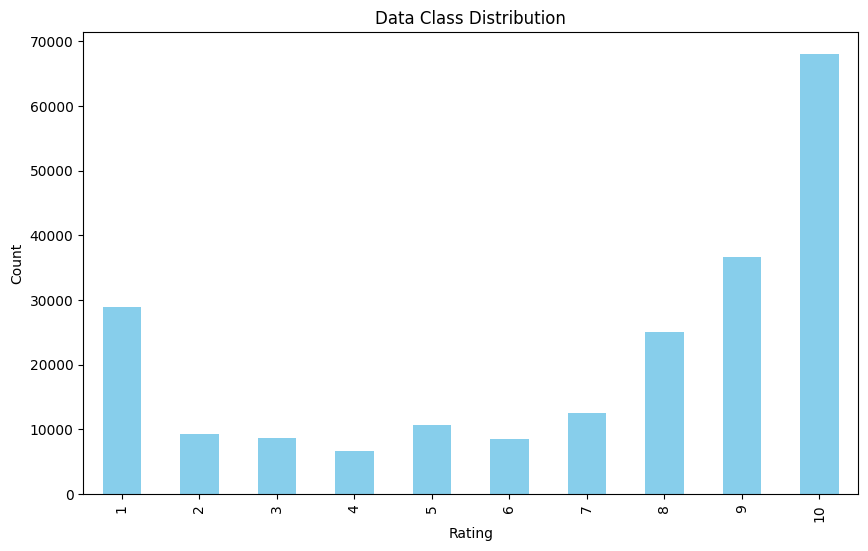

In [6]:
rating_counts = dataset_all.get_class_counts()

plt.figure(figsize=(10,6))
rating_counts.plot.bar(color='skyblue')
plt.title('Data Class Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

### Binarize Ratings

In [7]:
dataset_all.encode_binary_sentiment()

### Data Sample

In [8]:
dataset_all.data.head()

,drug_name,condition,review,rating,sentiment
0,mirtazapine,depression,I&#039;ve tried a few antidepressants over the...,10,1
1,paroxetine,hot flashes,Holy Hell is exactly how I feel. I had been ta...,1,0
2,belviq,weight loss,This is a waste of money. Did not curb my app...,1,0
3,seroquel,schizoaffective disorde,"No problems, watch what you eat.",10,1
4,chantix,smoking cessation,I smoked for 50+ years. Took it for one week ...,10,1


### Data Exploration

In [9]:
print("Number of Reviews: ", len(dataset_all))
print("Number of Drugs: ", len(dataset_all.get_drug_names()))
print("Number of Conditions: ", len(dataset_all.get_conditions()))

Number of Reviews:  96923
Number of Drugs:  3169
Number of Conditions:  782


### Data Class Distribution

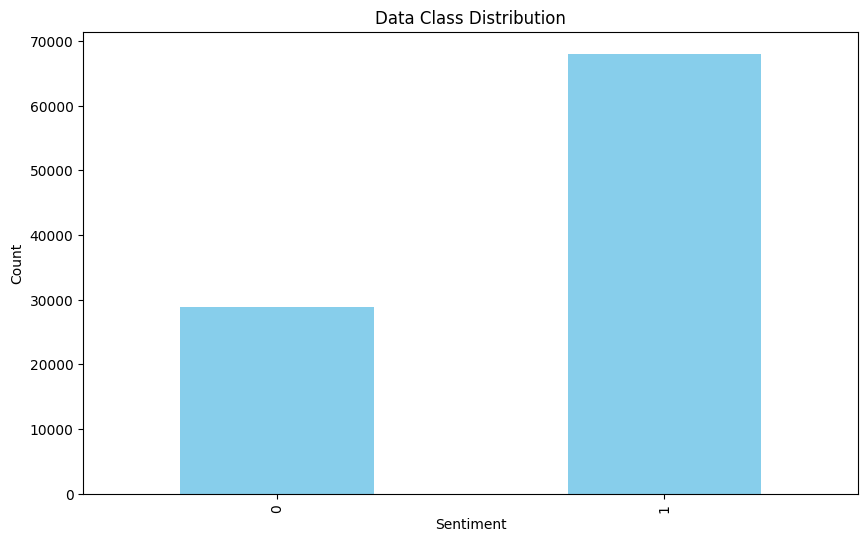

In [10]:
rating_counts = dataset_all.get_class_counts()

plt.figure(figsize=(10,6))
rating_counts.plot.bar(color='skyblue')
plt.title('Data Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

### Train_test Split

In [11]:
dataset_train = ReviewDataset(data_path_train)
dataset_test = ReviewDataset(data_path_test)

### Train-Test Data Exploration

In [12]:
print("Number of Training Set Reviews: ", len(dataset_train))
print("Number of Testing Set Reviews: ", len(dataset_test))
print(f"Train-Test Ratio: {len(dataset_train) / (len(dataset_train) + len(dataset_test)): .2f}")

Number of Training Set Reviews:  72608
Number of Testing Set Reviews:  24315
Train-Test Ratio:  0.75
